In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing/splitting/metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,roc_curve

#tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [2]:
# import data
data = pd.read_csv('../../data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## The data
The attributes of the data are:
* **age**: The age of the patient <br> $\in[29,77]$
* **sex**: Gender of the patient <br>   $\{0: female$, $1: male\}$.
* **cp**: Type of chest pain
    - $0$: typical angina
    - $1$: atypical angina
    - $2$: non-anginal pain
    - $3$: asymptomatic
* **trestbps**: Resting blood pressure <br>$\in[94,200]$ mm Hg
* **chol**: Serum cholesterol.<br>$\in[126,564]$ mg/dl
* **fbs**: Fasting blood sugar > 120 mg/dl<br>$\{0:False, 1:True\}$
* **restecg**: Resting electrocardiographic results
    - $0$: normal
    - $1$: having ST-T wave abnormality
    - $2$: showing probable or definite left ventricular hypertrophy 
* **thalach**: Maximum heart rate achieved <br> $\in[71,202]$
* **exang**: Exercise induced angina<br>$\{0:No, 1:Yes\}$
* **oldpeak**: ST depression induced by exercise relative to rest<br> $\in[0,6.2]$
* **slope**: Slope of the peak exercise ST segment
    - $0$: upsloping
    - $1$: flat
    - $2$: downsloping
* **ca**: Number of major vessels colored by fluoroscopy.<br> $\in\{0,1,2,3,4\}$
* **thal**: Thalassemia type<br> $\in\{0,1,2,3\}$
* **target**: Diagnosis of heart disease<br>$\{0:No, 1:Yes\}$

# Insights from the graphs
* **typ_chestpain**: apart from type 0 (atypical angina), all other chest pains (asymptomatic as well) pose higher counts of heart disease diagnosis than otherwise
* **rest_ecg**:patients with a type 1 (ST-T wave abnormality) are at greater risk of heart disease diagnosis
* **slope**: patients with a slope of 2 are at a higher risk of heart disease
* **Nof_fvessel**: patients with no flourospectered vessels are at the highest risk of heart disease diagnosis
* **typ_thalassemia**: patients with type 2 thalassemia are noticeably more vulnerable
* **sex**: women seem marginally more susceptible to a heart disease diagnosis

In [3]:
# splitting the data into features and target
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(f'The shapes of features matrix is {X.shape} and the target vector is {y.shape}')

The shapes of features matrix is (303, 13) and the target vector is (303,)


In [4]:
# creating a train and test feature matrix/target vector
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.2)
print(f'The shapes of the training feature space is {X_train.shape} and the training target vector is {y_train.shape} \nThe shapes of the test feature matrix is {X_test.shape} and the test target vector is {y_test.shape}')

The shapes of the training feature space is (242, 13) and the training target vector is (242,) 
The shapes of the test feature matrix is (61, 13) and the test target vector is (61,)


In [5]:
# Creating the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
#making the classifier predict the test feature matrix
y_Tepred = clf.predict(X_test)
y_Trpred = clf.predict(X_train)

In [7]:
# showcasing the real decision tree
from sklearn.tree import export_graphviz

export_graphviz(
    clf,
    out_file='DTgraphs/heart_tree.dot',
    feature_names=X.columns,
    class_names=['0','1'],
    rounded=True,
    filled=True
)

In [8]:
import pydot

(graph,) = pydot.graph_from_dot_file('DTgraphs/heart_tree.dot')
graph.write_png('heart.png')

![](heart.png)

In [9]:
# the accuracy score is
accTr = accuracy_score(y_train,y_Trpred)
accTe = accuracy_score(y_test,y_Tepred)
print(f'The accuracy score of the model on the training dataset is {accTr}\nThe accuracy score of the model on the test dataset is {accTe}')

The accuracy score of the model on the training dataset is 1.0
The accuracy score of the model on the test dataset is 0.7868852459016393


Text(0.5, 1.0, 'Confusion matrix for predictions on test data')

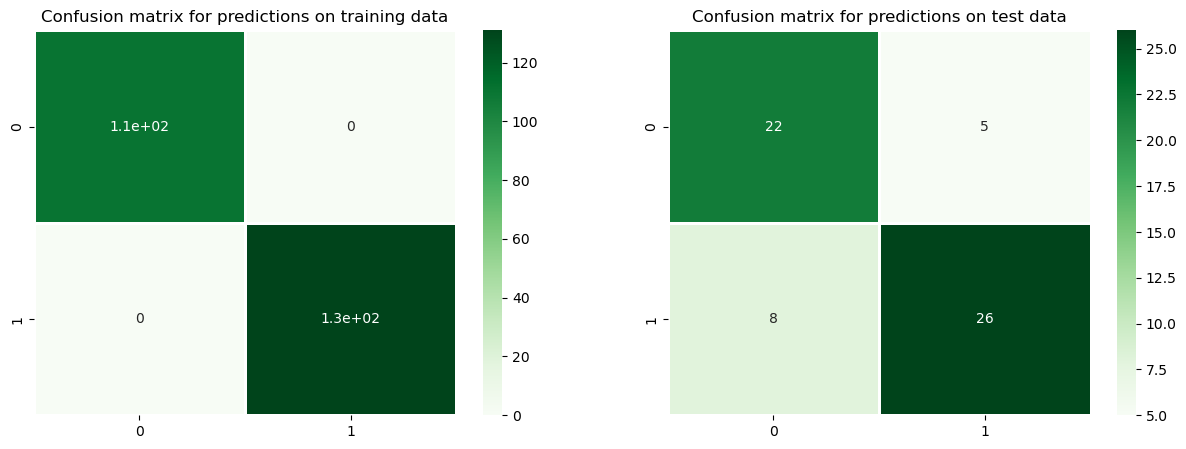

In [10]:
# obtaining and plotting the confusion matrix
confmatE = confusion_matrix(y_test,y_Tepred)
confmatR = confusion_matrix(y_train,y_Trpred)

plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(confmatR,linewidth=2,annot=True,cmap='Greens')
plt.title('Confusion matrix for predictions on training data')

plt.subplot(1,2,2)
sns.heatmap(confmatE,linewidth=2,annot=True,cmap='Greens')
plt.title('Confusion matrix for predictions on test data')


In [11]:
# precision, recall, fscore, support
prec, rec, f, supp = precision_recall_fscore_support(y_test,y_Tepred)
print(f'The precison:NoHeartDis {prec[0]} and HeartDis {prec[1]}\nThe Recall:NoHeartDis {rec[0]} and HeartDis {rec[1]}\nThe F-score:NoHeartDis {f[0]} and HeartDis {f[1]}\nThe support:NoHeartDis {supp[0]} and HeartDis {supp[1]}\n')

The precison:NoHeartDis 0.7333333333333333 and HeartDis 0.8387096774193549
The Recall:NoHeartDis 0.8148148148148148 and HeartDis 0.7647058823529411
The F-score:NoHeartDis 0.7719298245614035 and HeartDis 0.8
The support:NoHeartDis 27 and HeartDis 34



In [13]:
# the area under the ROC curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_Tepred)
print(f'The area under the ROC curve is {auc}')

The area under the ROC curve is 0.789760348583878


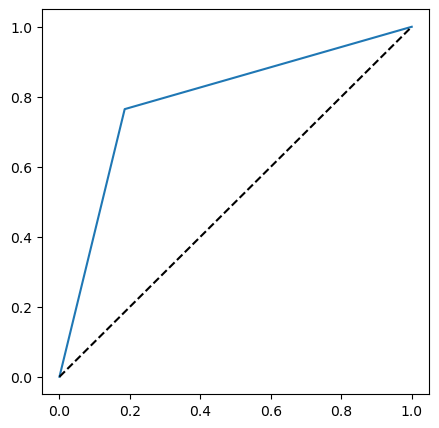

In [15]:
# the ROC curve
fpr,tpr,threshs = roc_curve(y_test,y_Tepred)
plt.subplots(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),ls='--',color='k')
plt.show()

In [16]:
# testing the classifier
clf.predict_proba([X.iloc[300,:].values])

C:\Users\ferdy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

# Parameters of the DecisionTreeClassifier

In [17]:
# tinkering with the max_depth parameter
param_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

max_depth = list()
accuracy = list()

for input_param in param_vals:
    model = DecisionTreeClassifier(max_depth = input_param, splitter='best')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    ACC = accuracy_score(y_pred,y_test)
    accuracy.append(ACC)
    max_depth.append(input_param)
    
df = pd.DataFrame(index=np.arange(0,15),data={
    'max_depth':max_depth,
    'accuracy':accuracy
})
print(df) #best depth is 3

    max_depth  accuracy
0           1  0.786885
1           2  0.737705
2           3  0.819672
3           4  0.803279
4           5  0.770492
5           6  0.786885
6           7  0.803279
7           8  0.770492
8           9  0.754098
9          10  0.786885
10         11  0.786885
11         12  0.786885
12         13  0.737705
13         14  0.803279
14         15  0.770492


In [18]:
# creating a new classifier on the with the best max-depth and random splitter
clf_md3 = DecisionTreeClassifier(max_depth=3)
clf_md3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
# predicting
y_pred = clf_md3.predict(X_test)

In [20]:
# accuracy, precision, recall, fscore, support
prec2, rec2, f2, supp2 = precision_recall_fscore_support(y_test,y_pred)
acc2 = accuracy_score(y_test,y_pred)

print(f'The accuracy is {acc2*100:.3f}')
print(f'The precison:NoHeartDis {prec2[0]:.3f} and HeartDis {prec2[1]:.3f}\nThe Recall:NoHeartDis {rec2[0]:.3f} and HeartDis {rec2[1]:.3f}\nThe F-score:NoHeartDis {f2[0]:.3f} and HeartDis {f2[1]:.3f}\nThe support:NoHeartDis {supp2[0]:.3f} and HeartDis {supp2[1]:.3f}\n')

The accuracy is 81.967
The precison:NoHeartDis 0.767 and HeartDis 0.871
The Recall:NoHeartDis 0.852 and HeartDis 0.794
The F-score:NoHeartDis 0.807 and HeartDis 0.831
The support:NoHeartDis 27.000 and HeartDis 34.000



# Random Forests

## about the dataset Customer Churn
Customer churn, also called customer attrition, is when a customer chooses to stop using the products or services of a company. However, to-be-attrited customers tend to put out signs indicating their future departure. By analyzing these signs and carrying out Churn-analysis, we could predict and take action about customers who are on the fence about quitting the company.
* *eg* The Telecom industry faces a lot of Churn (with annual churn rates of 15-25%) because the customers can choose from a variety of service providers and actively switch from one to another.
* While looking at both Business operational insights (*eg* declining repeat purchases, reduced purchase quantity) and Customer experience insights along the customer feedbacks is foundational in order to predict churn. A scenario where a customer who has declined in recent visits and gives a feedback score of 6 out of 10 after their latest shopping experience, could have an increased probability of churning
* Generally, from a business perspective, it costs more to acquire new customers than it does to retain existing ones. In fact, just a 5% increase in customer retention could bump profits by 25%. This is because returning customers are 60% more likely to spend on a company's products and services. 
* As a result, the company can spend less on the initiation/acquisition costs of new customers by shifting their focus on maintaining the existing customer base, with a close emphasis on on-the-fence (close to leaving) customers.
* Hence, if a company possessed a model which could identify these vulnerable customers, and the source of their vulnerability, it can focus customer retention efforts only on these 'high risk' customers. This helps in achieving the goal of maintaining the customer base: by identifying and focusing efforts on the most vulnerable.

### How do we address and mitigate Customer Churn?
* To this end, we collect data that could be passed to a classifier: customers and their interactions across numerous channels, including store visits, product purchase history, customer service calls, web-based transactions, and social media interaction.
* We can then train a classifier on this data, identifying the most relevant metrics that lead to customer attrition.
* By identifying potentially attrited-customers and their issues, businesses can preserve their market position and also thrive with a stable customer base. 
* They'll also save on the initiation costs of new customers (to make up for the losses due to churn), hence the two-fold benefits of addressing customer churn.

In [ ]:
# importing extra libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import warnings
warnings.filterwarnings('ignore')

# importing the RandomForest and other classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# already have the DecisionTreeClassifier module

In [7]:
df = pd.read_csv('../../data/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
indx = df[df.TotalCharges==' '].index #customer id is of no use in churn prediction

## Data Preprocessing/cleaning

In [9]:
# Nulls and Nans
df.isna().sum() #none

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# duplicates
df[df.duplicated()] #none

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
# converting the SeniorCitizen column to a proper categorical column
df.SeniorCitizen.replace({0:'No',1:'Yes'},inplace=True)
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [12]:
# converting total charges column to float
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
df.TotalCharges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [13]:
# removing nulls
# df.isnull().sum()
df.TotalCharges.fillna(value = df.loc[indx,'MonthlyCharges'],inplace=True)

In [14]:
df.iloc[indx[:4],:] #nulls taken care of

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No


In [15]:
# We will also want to remove very new customer (tenure=0), as they are of limited value as compared to customers with longer tenures
df.drop(index=df[df.tenure==0].index,inplace=True)
df[df.tenure==0].shape

(0, 21)

## Data Visualization

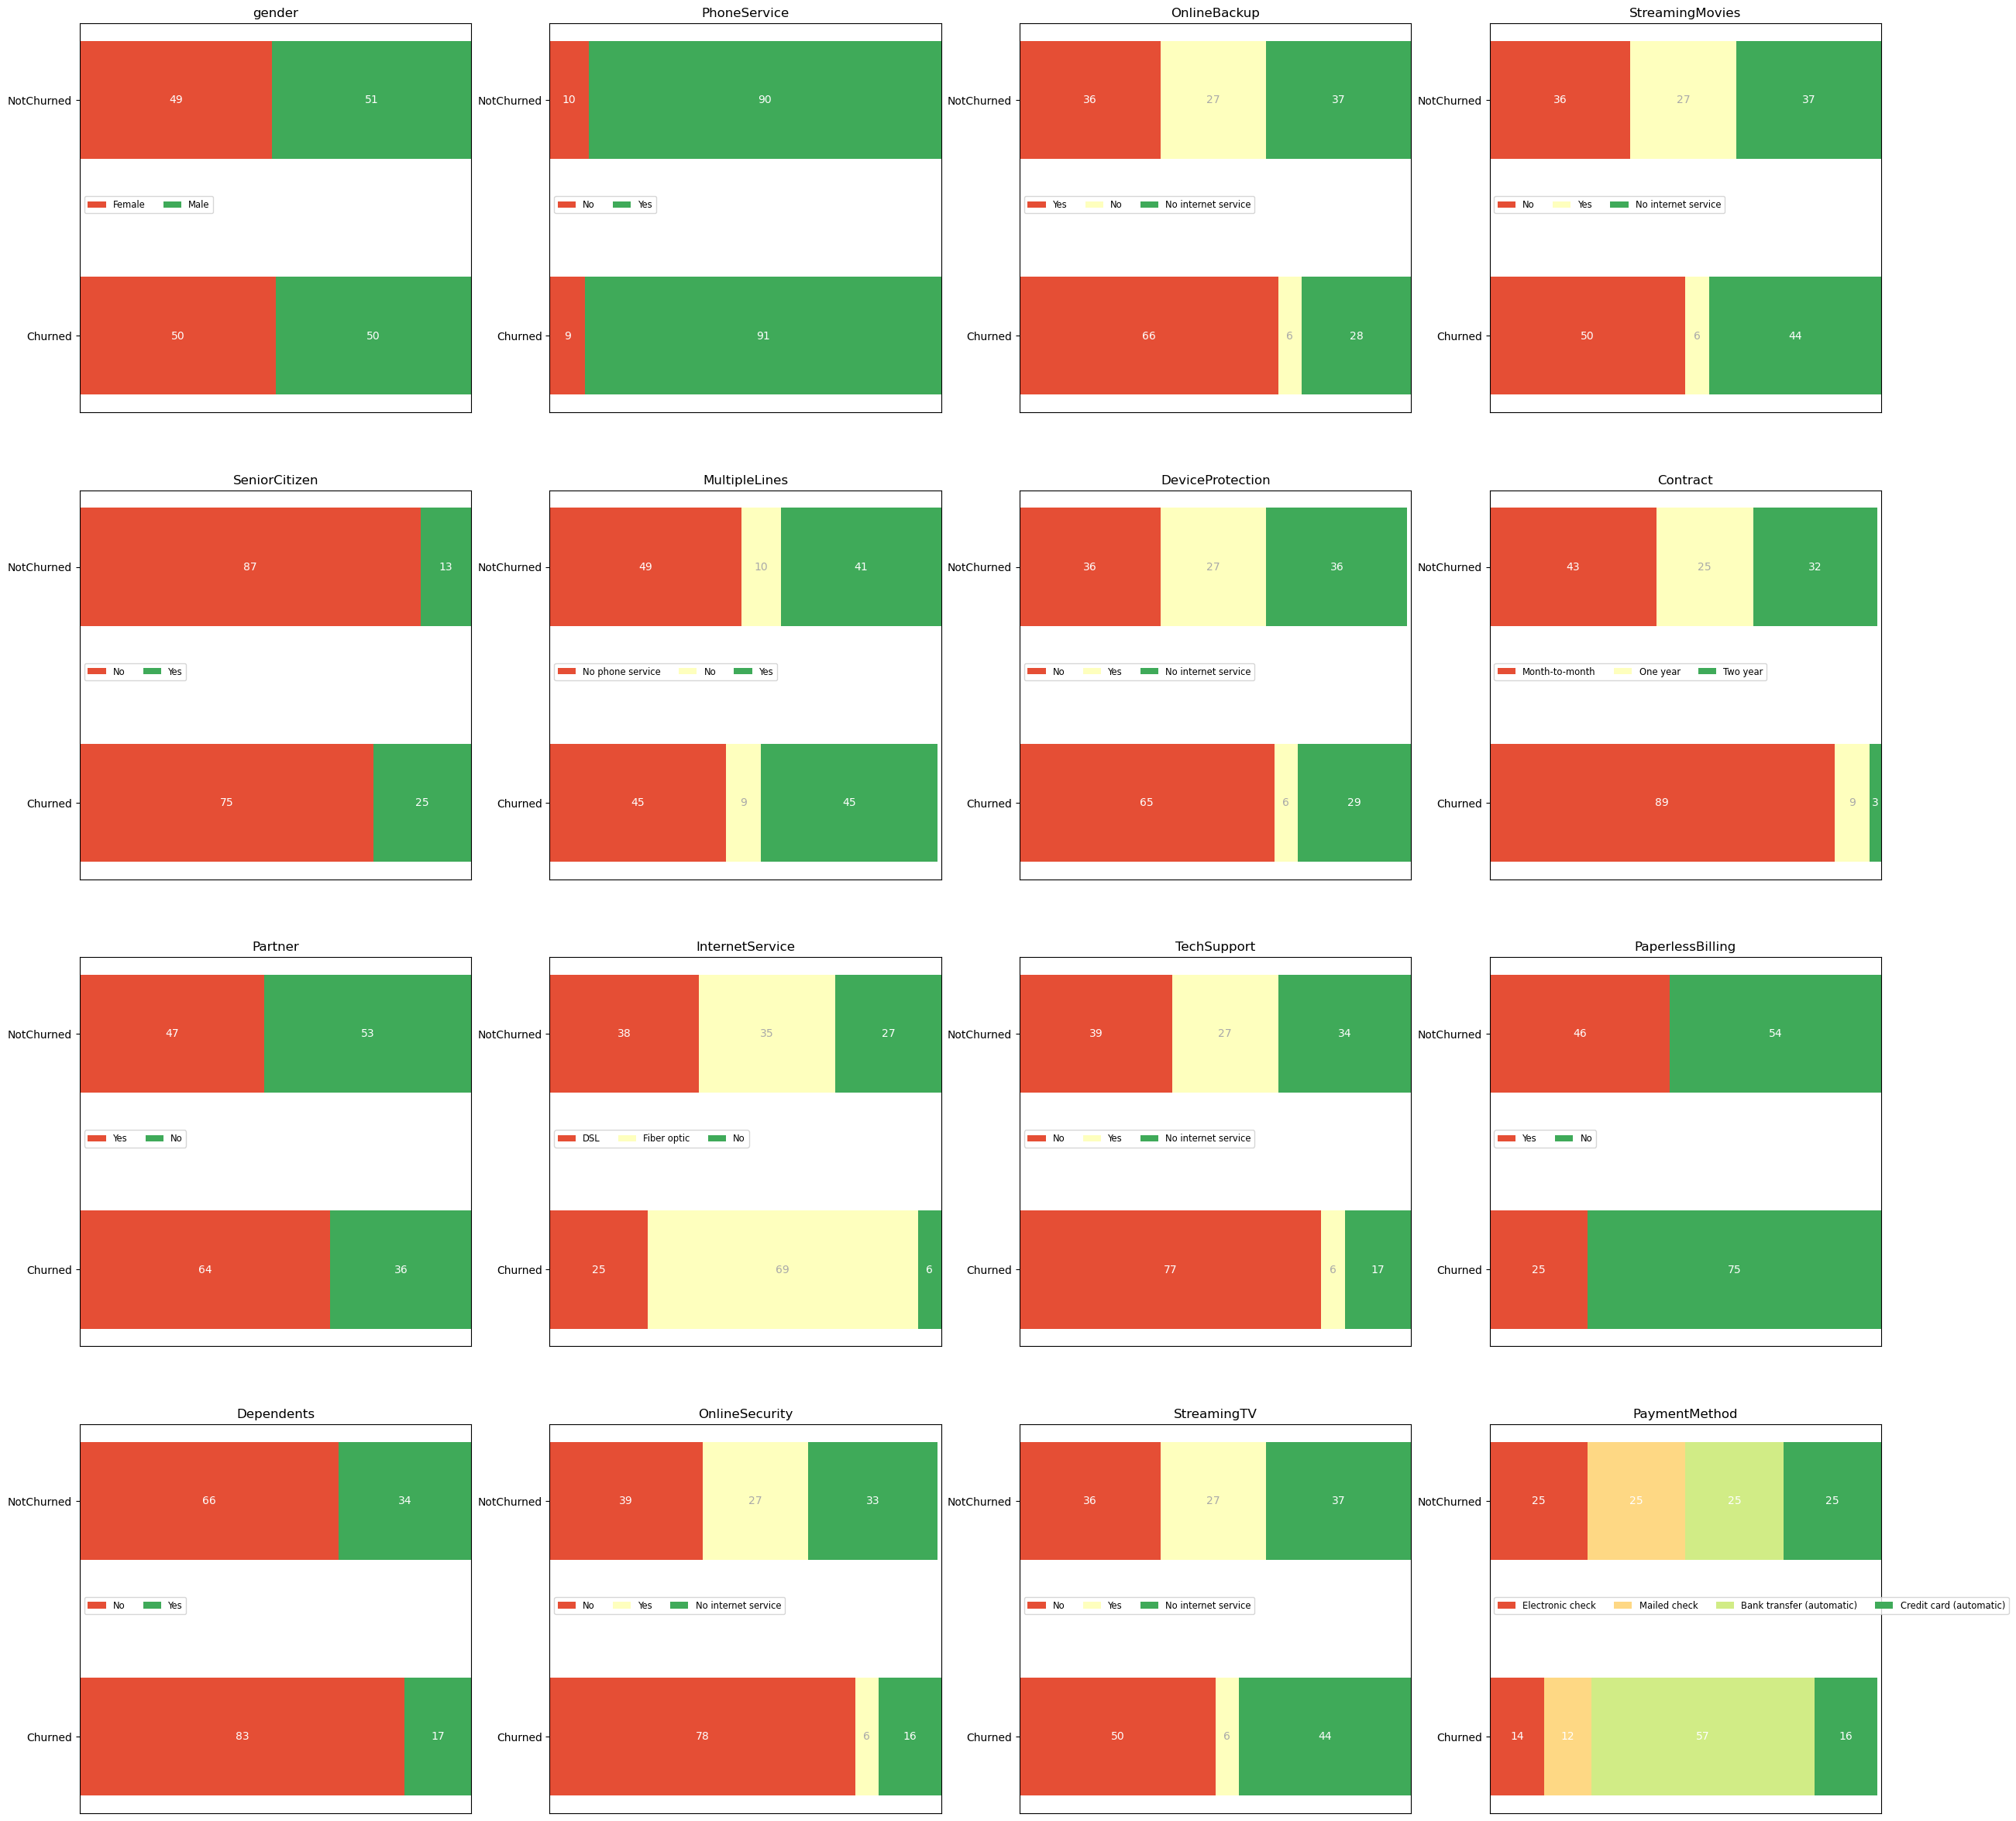

In [42]:
# discrete distribution as horizontal bar chart
# stacked bar charts can be used to visualize discrete distributions
catcols = df.iloc[:,1:-1].select_dtypes(include='object').columns
fig,axs = plt.subplots(4,4,figsize=(30,30))

x,y=0,0

for col in catcols:
    category_names = list(df[col].unique())
    dtemp = df[['Churn',col,'customerID']].groupby(['Churn',col]).count().values

    churn_data = dtemp[:df[col].nunique()]
    nochurn_data = dtemp[df[col].nunique():]
    results = {
        'NotChurned': np.around(churn_data*100/np.sum(churn_data),0),
        'Churned': np.around(nochurn_data*100/np.sum(nochurn_data),0)
    }

    labels = list(results.keys())
    data = np.array(list(results.values())).reshape(2,df[col].nunique())
    data_cum = data.cumsum(axis=1).reshape(2,df[col].nunique())
    category_colors = plt.colormaps['RdYlGn'](np.linspace(.15,.85,data.shape[1]))

    axs[x,y].invert_yaxis()
    axs[x,y].xaxis.set_visible(False)
    axs[x,y].set_xlim(0,np.sum(data,axis=1).max())
    axs[x,y].set_title(col)

    for i, (colname,color) in enumerate(zip(category_names,category_colors)):
        widths = data[:,i]
        starts = data_cum[:,i]-widths
        rects = axs[x,y].barh(labels,widths,left=starts,height=.5,label=colname,color=color)

        r, g, b, _ = color
        text_color = 'white' if r*g*b < .5 else 'darkgrey'
        axs[x,y].bar_label(rects, label_type='center',color=text_color)
    axs[x,y].legend(ncols = len(category_names),loc='lower left',bbox_to_anchor=(0,.5),fontsize='small')
    y+=x//3
    x=(x+1)%4
    
plt.show()


In [16]:
df.drop(columns=['customerID'],inplace=True) #dropping customerId, as it has no prediction value

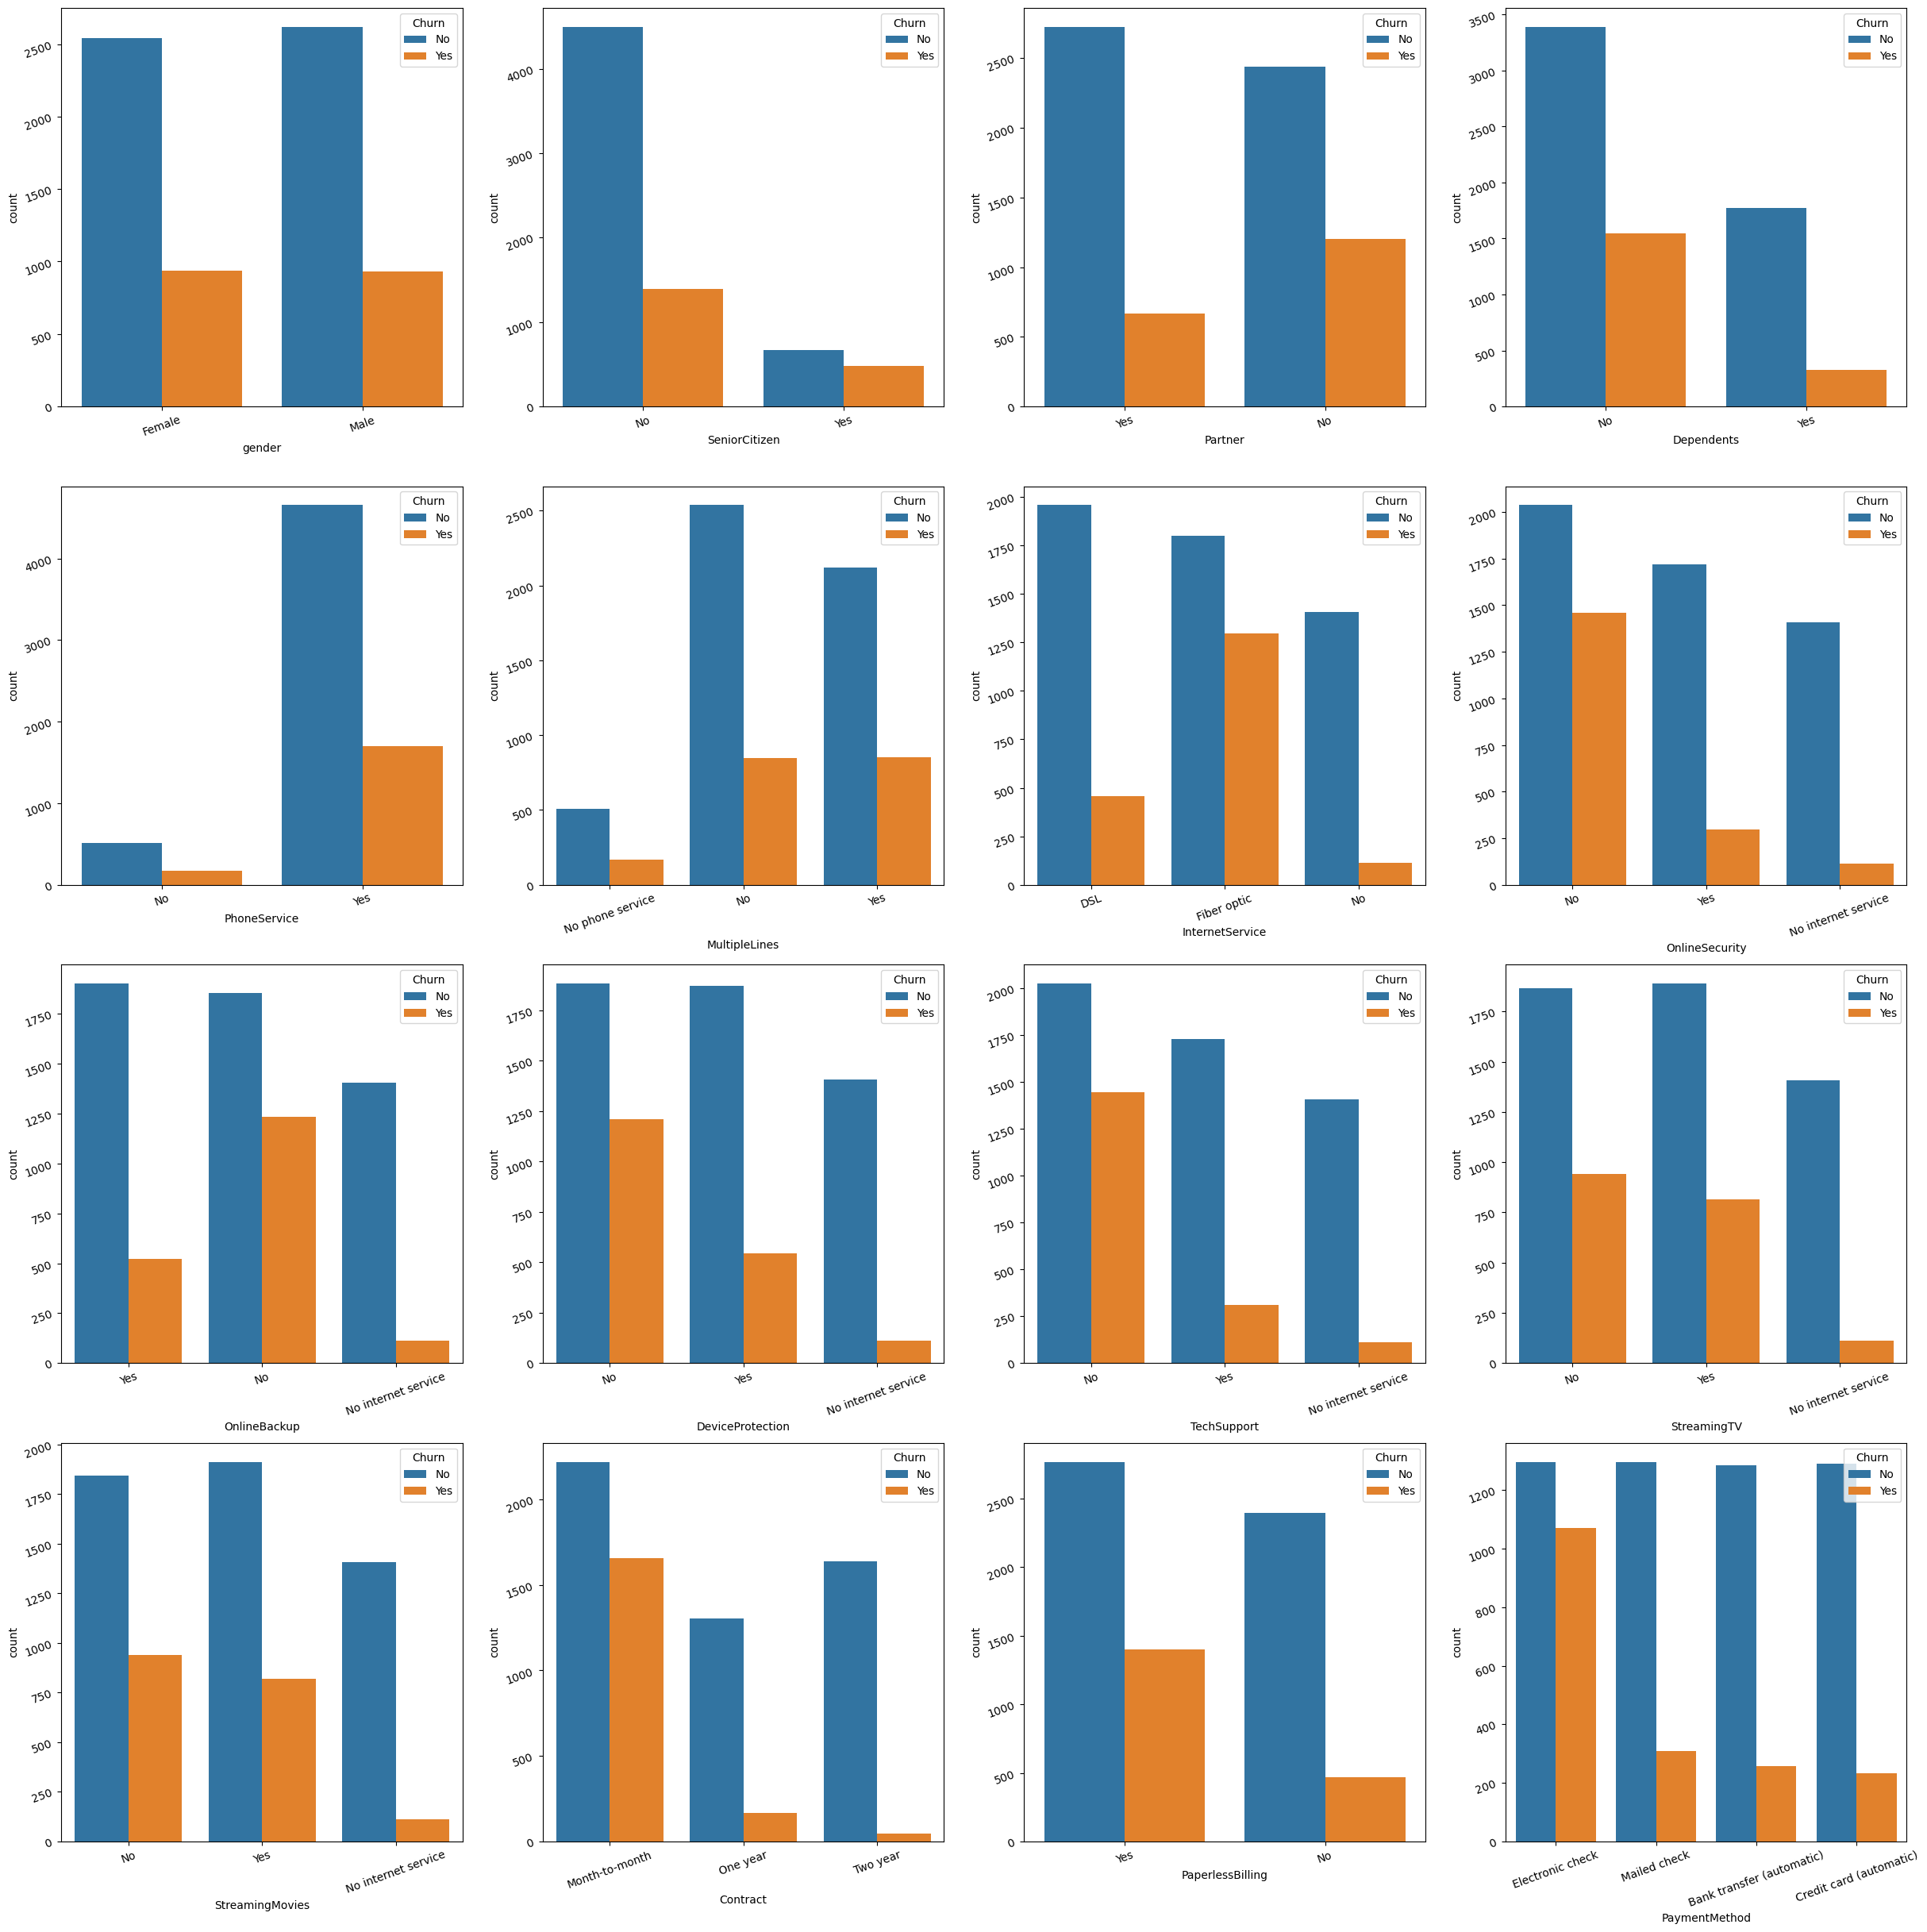

In [44]:
# categorical count plots, differentiated by churn/not churned
plt.subplots(4,4,figsize=(30,30))
for x,col in enumerate(df.iloc[:,:-1].select_dtypes(include='object').columns):
    plt.subplot(4,4,x+1)
    g= sns.countplot(data=df,x=col,hue='Churn')
    g.tick_params(rotation=20)

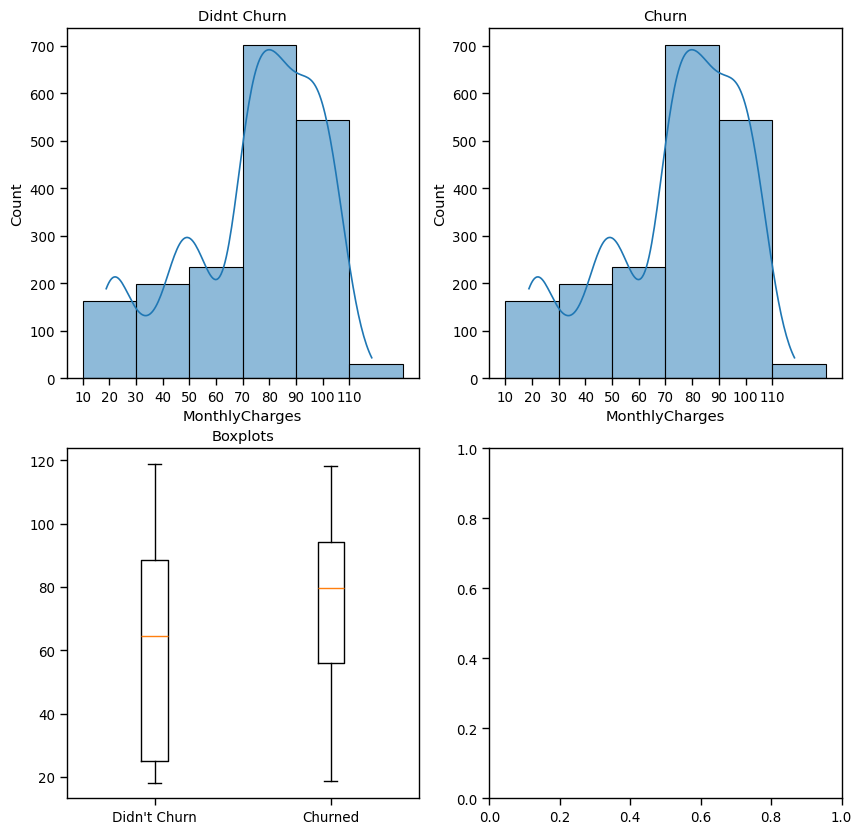

In [37]:
# hist, distribution and boxplots by churn status for the MonthlyCharges column
plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
g = sns.histplot(data=df[df['Churn']=='Yes'],x='MonthlyCharges',bins=np.arange(10,150,20),kde=True)
g.set_xticks(np.arange(10,120,10))
plt.title('Didnt Churn')

plt.subplot(2,2,2)
g2=sns.histplot(data=df[df.Churn=='Yes'],x='MonthlyCharges',bins=np.arange(10,150,20),kde=True)
g2.set_xticks(np.arange(10,120,10))
plt.title('Churn')

plt.subplot(2,2,3)
plt.boxplot(df[df.Churn=='No'].MonthlyCharges,positions=[0])
plt.boxplot(df[df.Churn=='Yes'].MonthlyCharges,positions=[1])
plt.title('Boxplots')
plt.xticks([0,1],['Didn\'t Churn','Churned'])

plt.show()

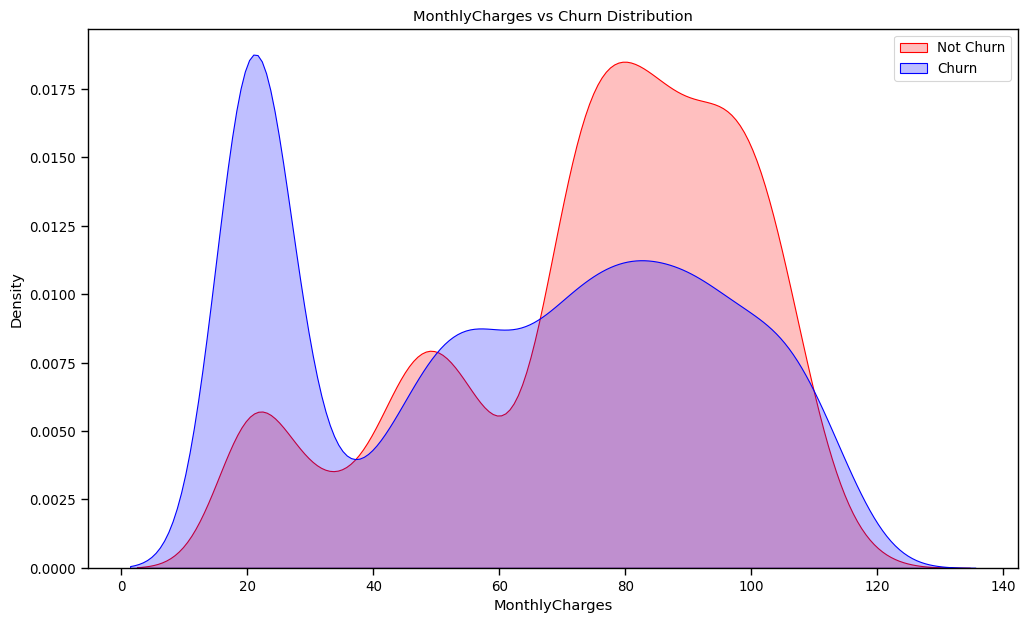

In [41]:
# density plots of MonthlyCharges by churn
plt.figure(figsize=(12,7))

sns.set_context('paper',font_scale=1.1)

#the density plots
ax = sns.kdeplot(data=df[df.Churn=='Yes'],x='MonthlyCharges', color='red',shade=True)
sns.kdeplot(data=df[df.Churn=='No'],x='MonthlyCharges', ax=ax,color='blue',shade=True)

ax.legend(['Not Churn','Churn'],loc='upper right')
# ax.set_ylabel('Density')
# ax.set_xlabel('MonthlyCharges')
plt.title('MonthlyCharges vs Churn Distribution')

plt.show()

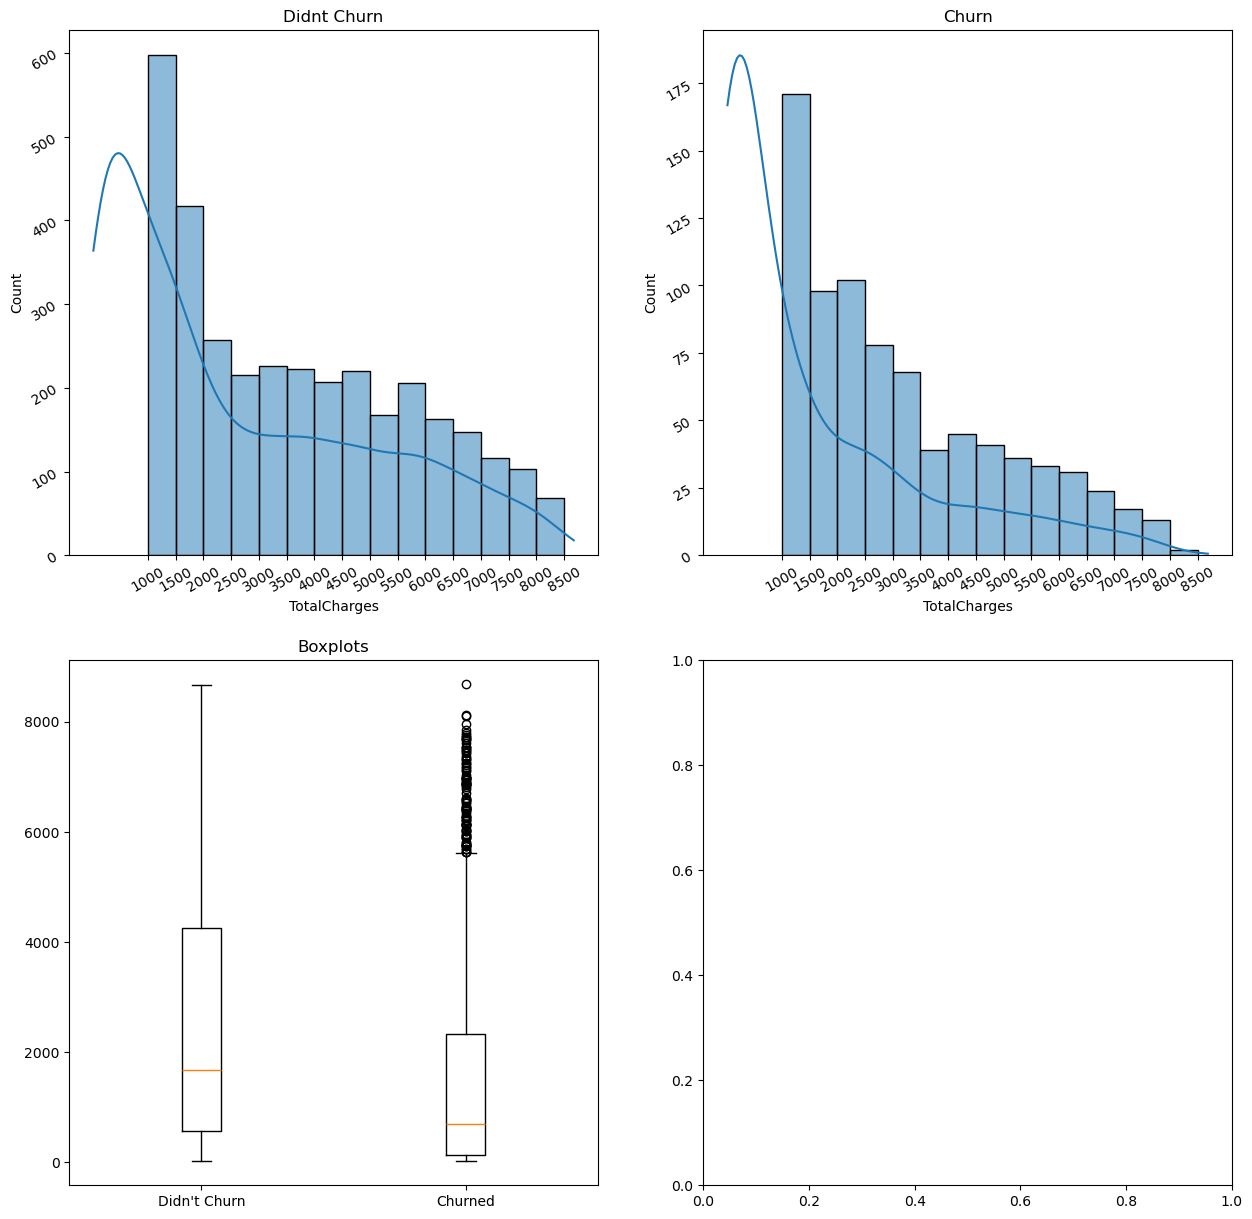

In [16]:
# hist, distribution and boxplots by churn status for the TotalCharges column
plt.subplots(2,2,figsize=(15,15))
plt.subplot(2,2,1)
g = sns.histplot(data=df[df.Churn=='No'],x='TotalCharges',bins=np.arange(1000,9000,500),kde=True)
g.set_xticks(np.arange(1000,9000,500))
g.tick_params(rotation=30)
plt.title('Didnt Churn')

plt.subplot(2,2,2)
g2=sns.histplot(data=df[df.Churn=='Yes'],x='TotalCharges',bins=np.arange(1000,9000,500),kde=True)
g2.set_xticks(np.arange(1000,9000,500))
g2.tick_params(rotation=30)
plt.title('Churn')

plt.subplot(2,2,3)
plt.boxplot(df[df.Churn=='No'].TotalCharges,positions=[0])
plt.boxplot(df[df.Churn=='Yes'].TotalCharges,positions=[1])
plt.title('Boxplots')
plt.xticks([0,1],['Didn\'t Churn','Churned'])

plt.show()

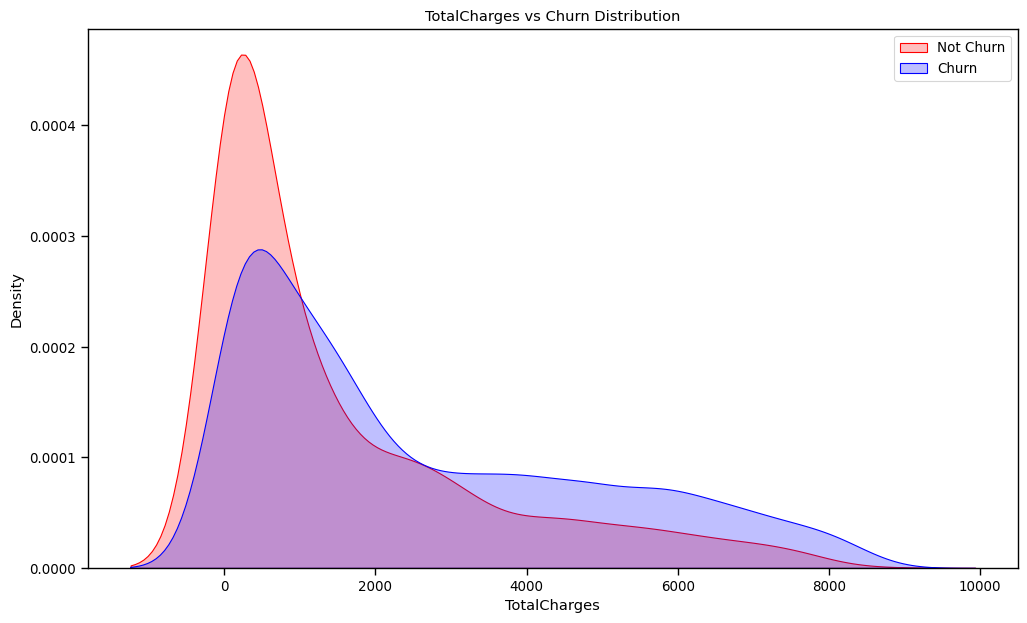

In [43]:
# density plots of TotalCharges by churn
plt.figure(figsize=(12,7))

sns.set_context('paper',font_scale=1.1)

#the density plots
ax = sns.kdeplot(data=df[df.Churn=='Yes'],x='TotalCharges', color='red',shade=True)
sns.kdeplot(data=df[df.Churn=='No'],x='TotalCharges', ax=ax,color='blue',shade=True)

ax.legend(['Not Churn','Churn'],loc='upper right')
# ax.set_ylabel('Density')
# ax.set_xlabel('TotalCharges')
plt.title('TotalCharges vs Churn Distribution')

plt.show()

# Tenure vs Churn Boxplot
fig = px.box(df,x='Churn',y='tenure')

#update y-axis properties 
fig.update_yaxes(title_text='Tenure (Months)',row=1,col=1)
#update x-axis properties
fig.update_xaxes(title_text='Churn',row=1,col=1)

#update size and title
fig.update_layout(autosize=True,width=750,height=600,
                 title_font=dict(size=25,family='Courier'),
                  title='<b>Tenure vs Churn Boxplot</b>')

fig.show()

# gender spread and churn distribution
gender_labels = ['Male','Female']
churn_labels = ['No','Yes']

#create subplots: use 'domain' type for Pie subplots
fig = make_subplots(rows =1, cols=2, specs = [[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_labels,values=df['gender'].value_counts(),name='Gender'),1,1)
fig.add_trace(go.Pie(labels=churn_labels,values=df['Churn'].value_counts(),name='Churn'),1,2)

#use 'hole' to create a donut pie chart
fig.update_traces(hole=.55,hoverinfo='label+percent+name',textfont_size=16)

fig.update_layout(title_text = 'Gender and Churn Distribution',
                  #add annotations in the center of the donut pies.
                  annotations=[
                      dict(text='Gender',x=.16,y=.5,font_size=20,showarrow=False),
                      dict(text='Churn',x=.83,y=.5,font_size=20,showarrow=False)])
fig.data[0].marker.colors=('#7fcdff','#326ada')
fig.data[1].marker.colors=('#56c175','#ff9b35')

fig.show()

# plotting the gender distribution for the churned and unchurned resp
plt.figure(figsize=(8,8))
labels=['Churn: Yes','Churn: No']
values = [1896,5163]

labels_gender=['F','M','F','M']
sizes_gender=[939,930,2544,2619]

colors = ['#ff9b35','#56c175']
colors_gender=['#7fcdff','#326ada','#7fcdff','#326ada']

explode=(.4,.4)
explode_gender=(.1,.1,.1,.1)
textprops={'fontsize':15}

#the plotting
plt.pie(values,labels=labels,autopct='%1.1f%%',pctdistance=1.08,labeldistance=.8,colors=colors,startangle=90,frame=True,explode=explode)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90,explode=explode_gender,radius=7,textprops=textprops)

#draw circle
center_circle = plt.Circle((0,0),5,color='black',fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Churn distribution wrt Gender: Male(M), Female(F)',fontsize=15,y=1.1)

#show plot
plt.axis('equal')
plt.tight_layout()
plt.show()

# contract distribution wrt Churn
color_discrete_map = {'Month-to-month':'#7fcdff','One year':'#326ada','Two year':'#ff9b35'}

fig = px.histogram(df,x='Churn',color='Contract',barmode='group',title='<b> Churn Distribution wrt Contract<b>',color_discrete_map=color_discrete_map)
fig.update_layout(width=700,height=500,bargap=.1)
fig.show()

# churn distribution wrt Payment methods
fig = px.histogram(df,x='Churn',color='PaymentMethod',title='<b>Churn distribution wrt Customer Payment Method </b>',text_auto=True)
fig.update_layout(width=700,height=500,bargap=.1)
fig.data[0].marker.color=('#7fcdff')
fig.data[1].marker.color=('#326ada')
fig.data[2].marker.color=('#ff9b35')
fig.data[3].marker.color=('#56c175')

fig.show()

# distribution by gender, internetservice and churn
fig = go.Figure()

colors = {'Female':'steelblue','Male':'firebrick'}

# DSL by (gender, Churn)
fig.add_trace(go.Bar(
x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
  ['Female','Male','Female','Male']],
y=[965,992,219,240],
name='DSL'))

# FibreOptic by (gender, Churn)
fig.add_trace(go.Bar(
x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
  ['Female','Male','Female','Male']],
y=[889,910,664,633],
name='Fiber Optic'))

# No Internet by (gender, Churn)
fig.add_trace(go.Bar(
x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
  ['Female','Male','Female','Male']],
y=[600,717,56,57],
name='No Internet'))

fig.update_layout(title_text = '<b> Churn Distribution wrt Internet Service and Gender</b>')
fig.data[0].marker.color=('#7fcdff','#7fcdff','#7fcdff','#7fcdff')
fig.data[1].marker.color=('#326ada','#326ada','#326ada','#326ada')
fig.data[2].marker.color=('#ff9b35','#ff9b35','#ff9b35','#ff9b35')

fig.show()

# churn distribution wrt partners 
color_discrete_map = {'Yes':'#7fcdff','No':'#326ada'}

fig = px.histogram(df,x='Churn',color='Partner',barmode='group',title='<b> Churn Distribution wrt Partners<b>',color_discrete_map=color_discrete_map)
fig.update_layout(width=700,height=500,bargap=.1)
fig.show()

# churn distribution wrt SeniorCitizen
color_discrete_map = {'Yes':'#7fcdff','No':'#326ada'}

fig = px.histogram(df,x='Churn',color='SeniorCitizen',title='<b> Churn Distribution wrt Senior Citizen<b>',color_discrete_map=color_discrete_map)
fig.update_layout(width=700,height=500,bargap=.1)
fig.show()

# churn distribution wrt OnlineSecurity
color_discrete_map = {'Yes':'#7fcdff','No':'#326ada','No internet service':'#ff9b35'}

fig = px.histogram(df,x='Churn',color='OnlineSecurity',barmode='group',title='<b> Churn Distribution wrt Oneline Security<b>',color_discrete_map=color_discrete_map)
fig.update_layout(width=700,height=500,bargap=.1)
fig.show()

# churn distribution wrt PaperlessBilling
color_discrete_map = {'Yes':'#7fcdff','No':'#326ada'}

fig = px.histogram(df,x='Churn',color='PaperlessBilling',title='<b> Churn Distribution wrt PaperlessBilling<b>',color_discrete_map=color_discrete_map)
fig.update_layout(width=700,height=500,bargap=.1)
fig.show()

# churn distribution wrt Phone service
color_discrete_map = {'Yes':'#7fcdff','No':'#326ada'}

fig = px.histogram(df,x='Churn',color='PhoneService',title='<b> Churn Distribution wrt Phone Service<b>',color_discrete_map=color_discrete_map)
fig.update_layout(width=700,height=500,bargap=.1)
fig.show()

# Conclusion from the visualizations
* 75% of customers who have month-to-month contract have opted to move out as compared to 13% of customers who have signed one year contract and 3% of customers who have signed two year contract
* The majority of customers who moved out were having electronic payment as payment method and others who opted for credit-card automatic transfer/Bank auto transfer and mailed check as payment method were less likely to leave
* Fiber optic service which was chosen by a lot of customers and it's evident that there's a high churn rate among these customers. This could expose an issue in the Fiber optic service which dissatisfied most of its customers; furthur looking into the issue might find a solution to plug churn from this reason
* Customers who opted for DSL service are larger in number and found to have less churn rate compared to Fibre Optic service.
* Customers without dependents and customers who have partners were more likely to churn with senior citizens being the least likely to churn
* The absence of online security, paperless billing system and services with no tech support showed a similar trend of high customer churn
* There's a small fraction of customers who are more likely to churn and it's been found that they don't have a phone service.

---
A Data Analyst's work would be done about here. Now a data scientist who creates prediction models to predict the churn
___


## Descriptive Stats

In [17]:
#  descriptive stats for numeric columns
df.describe(include=np.number)

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [18]:
# descriptive stats for categorical columns
df.describe(include='object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


## Correlation

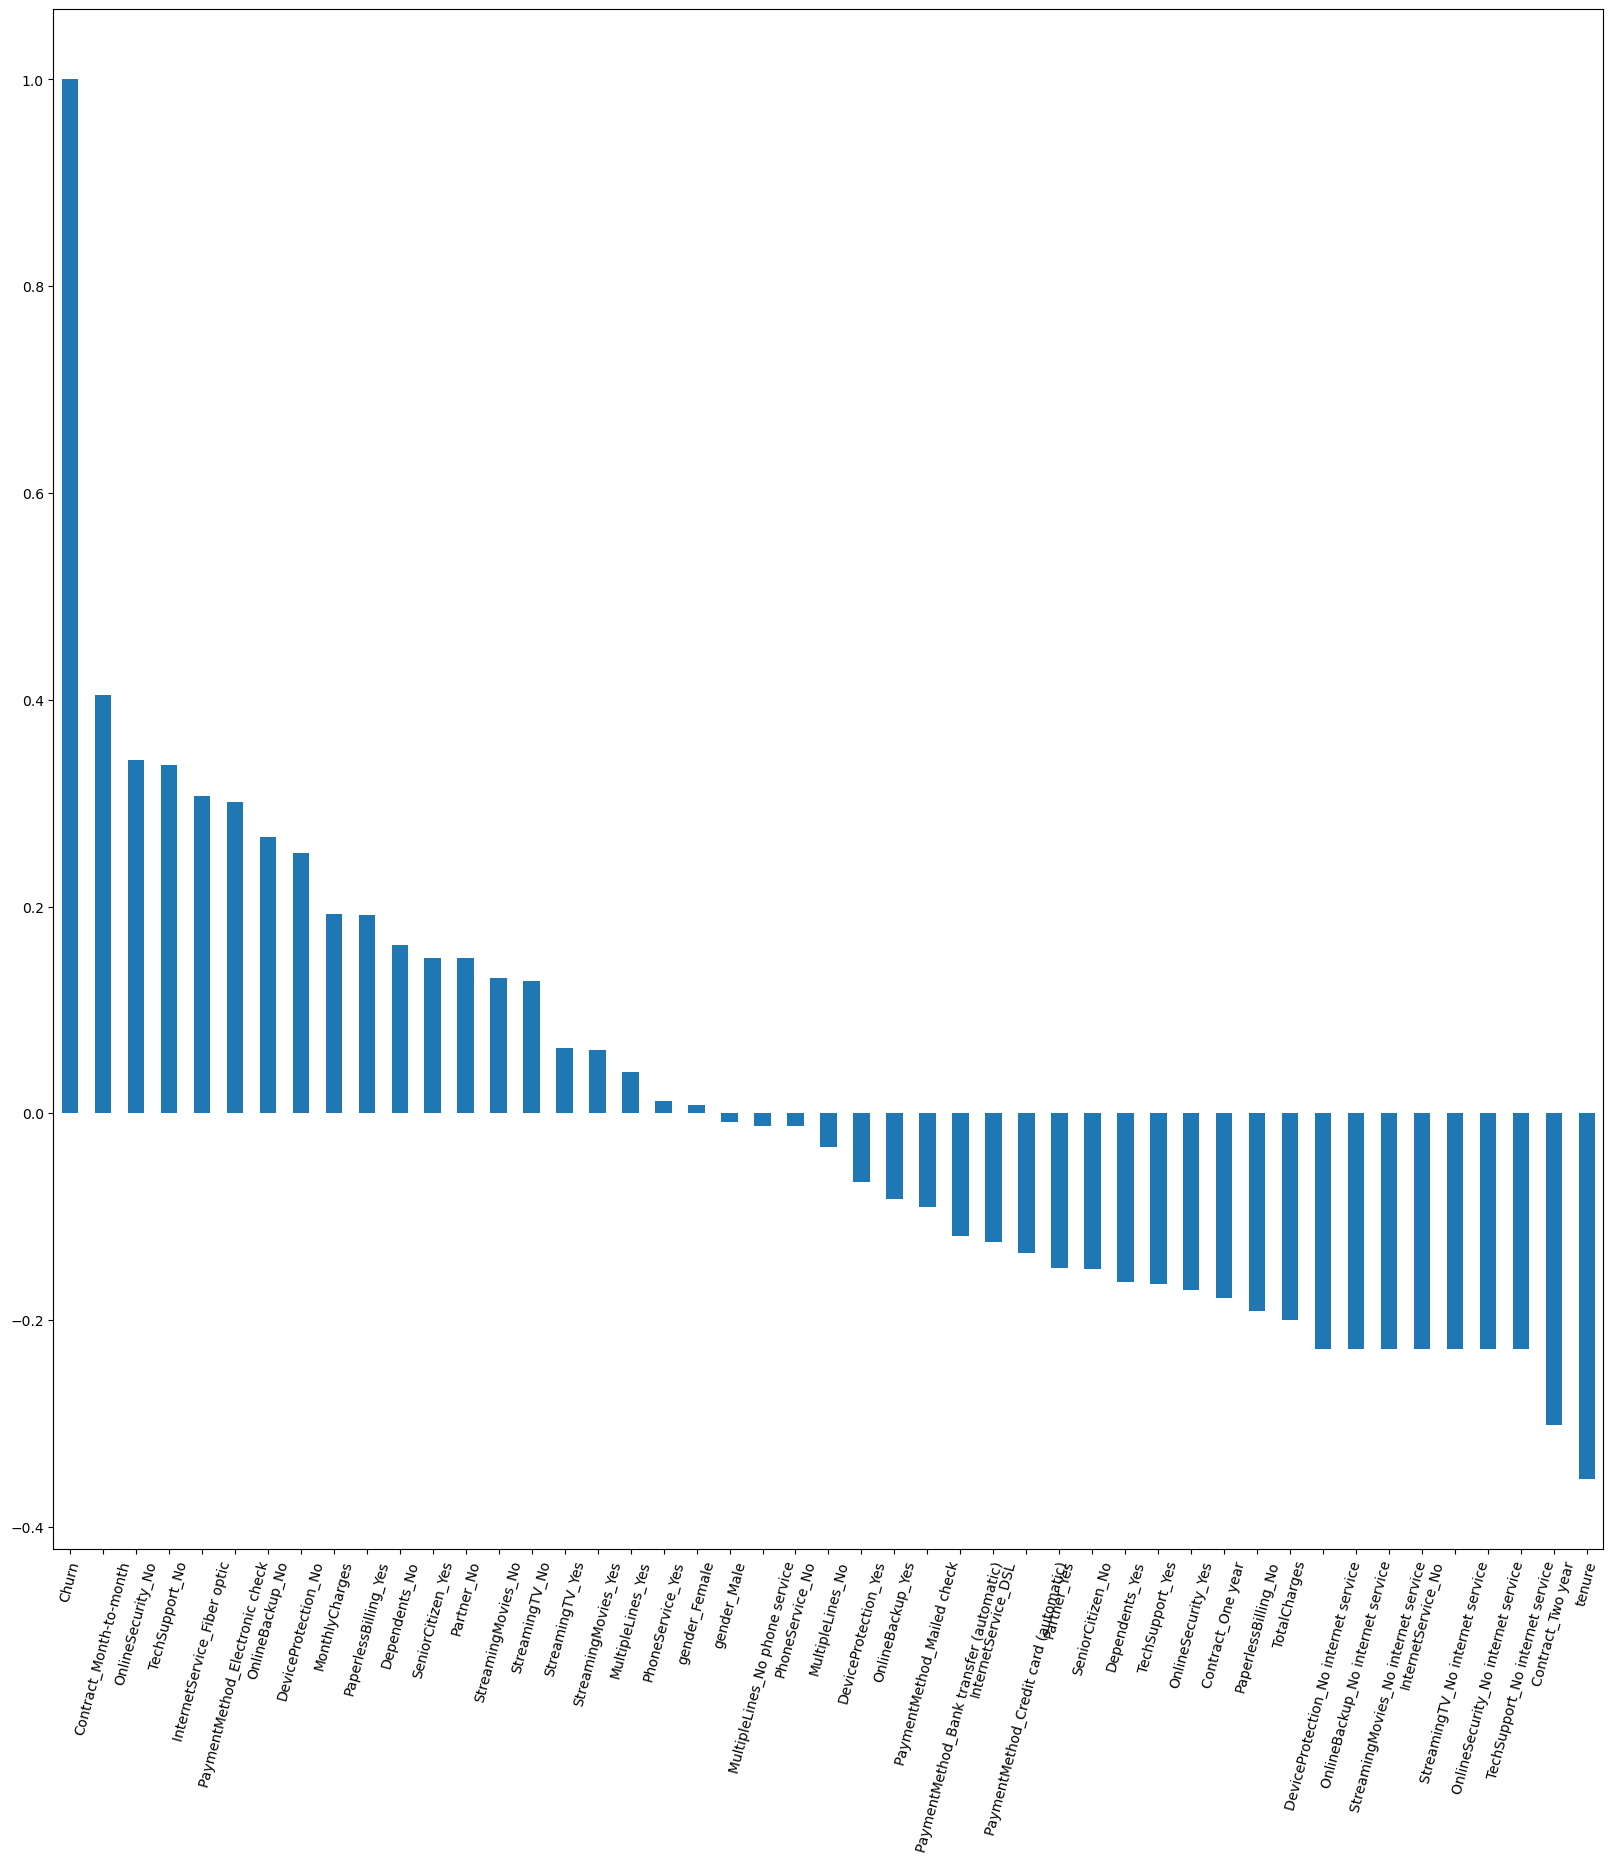

In [21]:
# correlation of 'churn' with features
plt.subplots(figsize=(20,20))
df_dum.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=75)
plt.show()

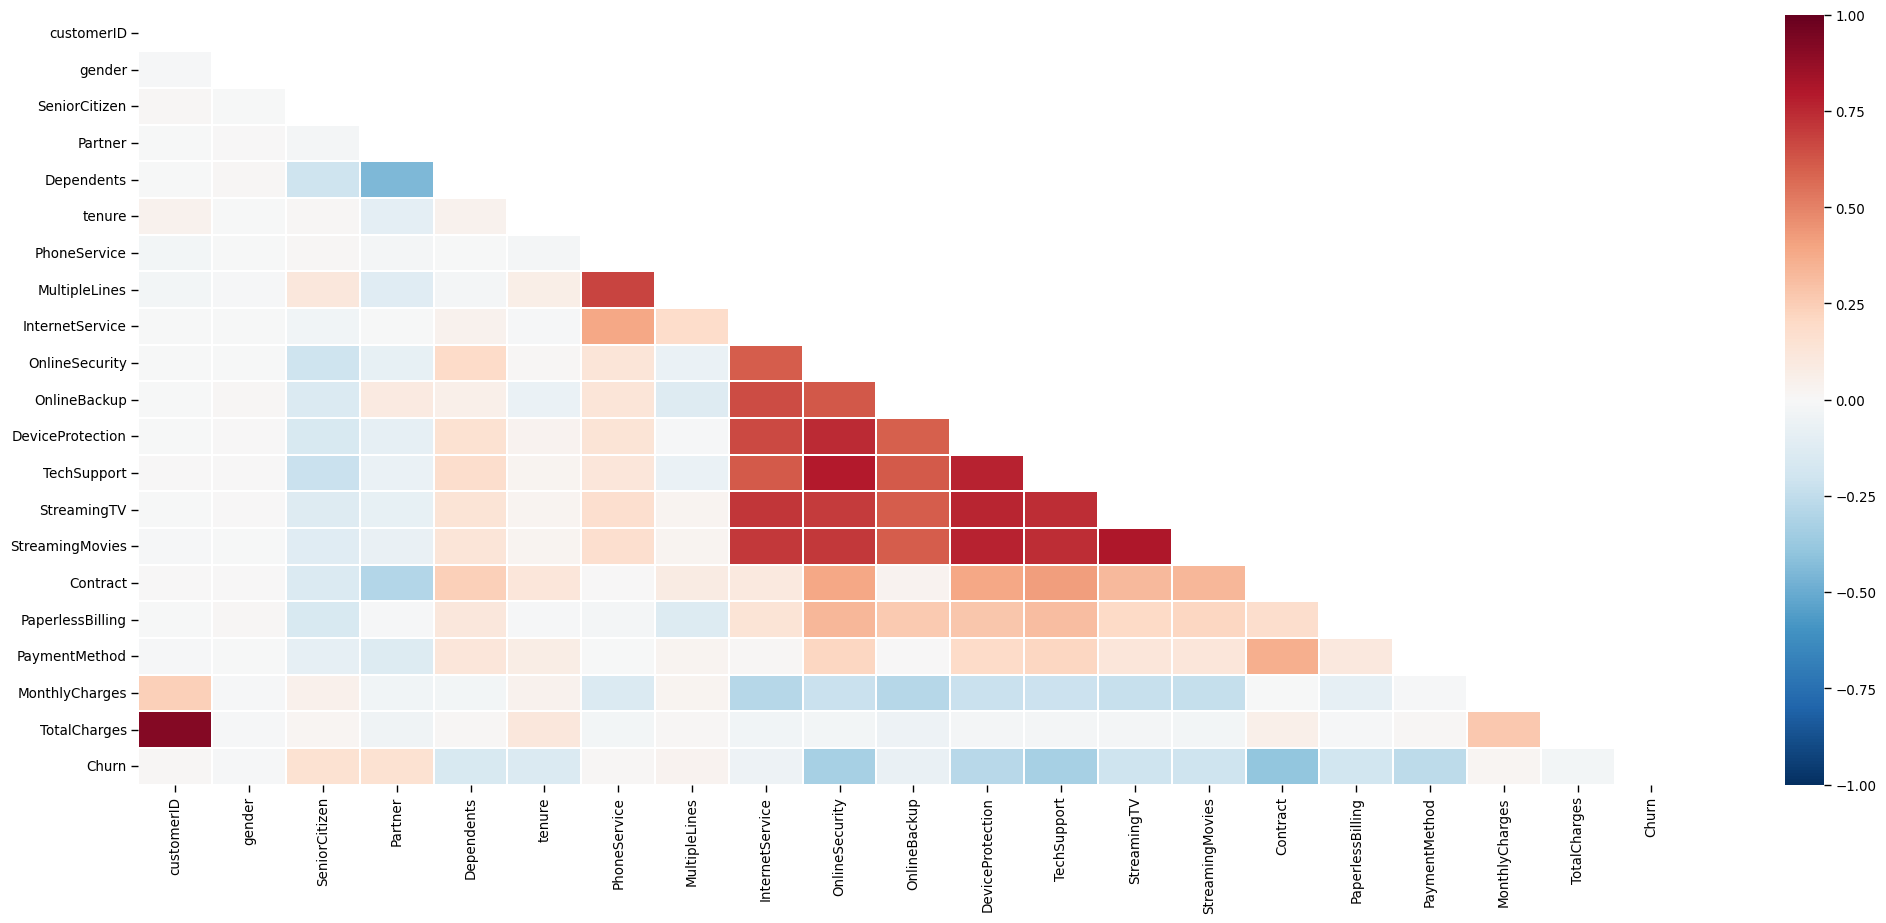

In [49]:
#normal correlation graph
plt.figure(figsize=(25,10))
corr = df.apply(lambda x:pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr,dtype=bool))
ax = sns.heatmap(corr,annot=True,mask=mask,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=.2,cmap='RdBu_r',vmin=-1,vmax=1)

# Preparing the data for the model
### Label Encoding vs OneHotEncoding
* Note that labelencoding should only be done to an output categorical variable, not to an input categorical
* For an input categorical, always use OneHotEncoding, unless the column is binary, in which case it is already OneHotEncoded in some sense
* Only use OneHotEncoding when the number of categories is more than 2

---
Converting a binary variable that takes the values of [0, 1] into a one-hot encoded of [(0, 1), (1, 0)] is redundant and not recommended for the following reasons:
___
* It is redundant because the binary variable is already in a form similar to the one-hot encoded, where the last column is dropped as it does not make any difference with or without it, because it can be inferred from the first given column:<br>*eg* If I give you [(0, ), (1,)], you can know the complementary column [(, 1), (, 0)].

* Suppose you have more than one binary variable, say 4 for example. If you convert them into one-hot encoded form, the dimension will increase from 4 to 8. The latter is not recommended for the following reasons:
    - The Curse of Dimensionality: High dimensional data can be so troublesome. That's because a lot of algorithms (e.g. clustering algorithms) use the Euclidean Distance which, due to the squared terms, is sensitive to noise. As a matter of fact, data points spread too thin as the dimensions increase, making data extremely noisy. Besides, the concept of neighborhood becomes meaningless, and approaches that are based on finding the relative contrast between distances of the data points become unreliable.
    - Time & Memory Complexity: It is intuitive that increasing the number of features will cost the algorithm more execution time and memory space requirement. To name a few, algorithms that use the Covariance Matrix in its computation will get affected. Polynomial algorithms will end up with too many terms...and so on. In general, the learning usually is faster with less features especially if the extra features are redundant.
    - Multi-Collinearity: Since the last column in the one-hot encoded form of the binary variable is redundant and 100% correlated with the first column, this will cause troubles to the Linear Regression-based Algorithms. For example, since the ordinary least squares estimates involve inverting the matrix, a computer algorithm may be unsuccessful in obtaining an approximate inverse, if a lot of features are correlated, and hence the inverse may be numerically inaccurate. Also, linear models work by observing the changes in the dependent variable y with the unit changes in one independent variable after holding all other independent variables as constants, yet in case independent variables are highly correlated, the latter fails (there are more other consequences of Multi-Collinearity) (although some other algorithms might be less sensitive to this as in Decision Trees).
    - Overfitting-prone: In general, too many features (regardless if they're correlated or not) may overfit your model and fail to generalize to new examples, as every data point in your dataset will be fully identified by the given features (search Andrew NG lectures, he explained this in detail)
---
Summary
---

In a nutshell, converting a binary variable into a one-hot encoded one is redundant and may lead to troubles that are needless and unsolicited. Although correlated features may not always worsen your model, yet they will not always improve it either.


This is Label Encoding
~~~
# Creating dicts to convert categorical variables to numeric
catcols = df.iloc[:,:].select_dtypes('object').columns.values
  
dofd = {D: {k:v for v,k in enumerate(df[D].astype('category').cat.categories.values)} for D in catcols}
rdofd = {D: {k:v for v,k in dofd[D].items()} for D in dofd.keys()}


# passing the dictionary to replace all the categorical values in the dataframe
for col in catcols:
    df.replace(dofd[col],inplace=True)

# undoing the labelling
for col in catcols:
    df[col].replace(rdofd[col],inplace=True)

df.head()
~~~

## Label Encoding for the Binary-valued columns in features

In [17]:
# finding the columns with only binary value
bincols = [col for col,count  in df.nunique().items() if count==2]

#creating dicts for the bincols
dofd = {D: {k:v for v,k in enumerate(df[D].astype('category').cat.categories.values)} for D in bincols}
rdofd = {D: {k:v for v,k in dofd[D].items()} for D in dofd.keys()}

#passing the dict to replace all the binary categorical values in the dataframe
for col in bincols:
    df[col].replace(dofd[col],inplace=True)
    
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


## OneHotEncoding

In [18]:
# getting the multi-category columns
mulcatcols = [col for col,val in df.select_dtypes(include='object').nunique().items() if val>2]

# OneHotEncoding using the pandas.get_dummies()
dfin = pd.get_dummies(df[mulcatcols],dtype='int')

#dropping the last column of every variable type, as it's redundant (it's existence is already encoded in the values of the other cols)
for col in mulcatcols:
    dfin.drop(columns=col+'_'+str(df[col].unique()[df[col].nunique()-1]),inplace=True)
dfin.head(5)

,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1
2,1,0,1,0,0,1,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
3,0,1,1,0,0,1,1,0,0,1,...,1,1,0,1,0,0,1,1,0,0
4,1,0,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0


In [19]:
#combining the various columns together
dfin = pd.merge(df[bincols],dfin,left_index=True,right_index=True,suffixes=(None,None))
dfin = pd.merge(df[['tenure','MonthlyCharges','TotalCharges']],dfin,left_index=True,right_index=True,suffixes=(None,None))
dfin.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
2,2,53.85,108.15,1,0,0,0,1,1,1,...,0,1,0,1,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,0,0
4,2,70.70,151.65,0,0,0,0,1,1,1,...,0,1,0,1,0,1,0,0,1,0


## Standard Scaling
* Standardize features by removing the mean and scaling to unit variance.
* The standard score of a sample x is calculated as:
---
<p style='text-align:center;'>$(x-\mu)/\sigma$</p>
___


- where $\mu$ is the mean of the training samples or zero if with_mean=False, and $\sigma$ is the standard deviation of the training samples or one if with_std=False.
- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

In [20]:
#scaling the numerical columns
numcols= ['tenure','MonthlyCharges','TotalCharges']

scaler = StandardScaler()

dfin[numcols] = scaler.fit_transform(dfin[numcols])

dfin.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
1,0.064303,-0.260878,-0.173740,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
2,-1.239504,-0.363923,-0.959649,1,0,0,0,1,1,1,...,0,1,0,1,0,1,0,0,0,1
3,0.512486,-0.747850,-0.195248,1,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,0,0
4,-1.239504,0.196178,-0.940457,0,0,0,0,1,1,1,...,0,1,0,1,0,1,0,0,1,0


In [21]:
# to undo the standard scaling
dfin[numcols] = scaler.inverse_transform(dfin[numcols].values)
dfin.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
1,34.0,56.95,1889.50,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
2,2.0,53.85,108.15,1,0,0,0,1,1,1,...,0,1,0,1,0,1,0,0,0,1
3,45.0,42.30,1840.75,1,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,0,0
4,2.0,70.70,151.65,0,0,0,0,1,1,1,...,0,1,0,1,0,1,0,0,1,0


In [22]:
# defining the feature matrix and target vector
y = dfin.Churn
X = dfin.drop(columns='Churn')

In [23]:
# splitting the data
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=40,stratify=y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=99)

# Multiple Machine Learning Model Evaluations and Testing

#### The Random Forest Classifier

In [37]:
# The Random Forest Classifier

mod_rf = RandomForestClassifier(n_estimators=1000, oob_score=True,n_jobs=-1,
                               random_state=65, max_features='sqrt', max_leaf_nodes=35)

mod_rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=35, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=65)

In [38]:
# make predictions
y_pred = mod_rf.predict(X_test)
print(f'The Accuracy score of the model is {accuracy_score(y_test,y_pred)}')

The Accuracy score of the model is 0.8208955223880597


<Axes: >

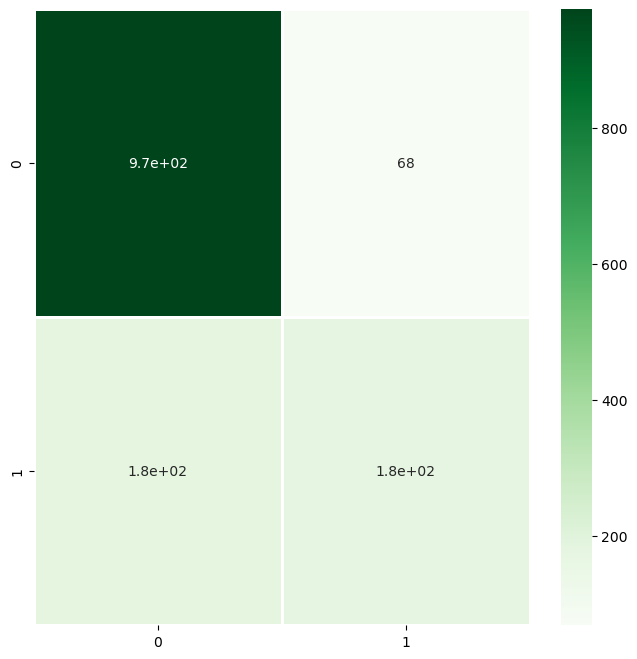

In [39]:
# the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Greens',linewidth=2,annot=True)

In [40]:
# precision, recall, fscore, support
prec, rec, f, supp = precision_recall_fscore_support(y_test,y_pred)
print(f'The precison:NoChurn {prec[0]:.2f} and Churn {prec[1]:.2f}\nThe Recall:No Churn {rec[0]:.2f} and Churn {rec[1]:.2f}\nThe F-score:No Churn {f[0]:.2f} and Churn {f[1]:.2f}\nThe support:No Churn {supp[0]} and Churn {supp[1]}\n')

The precison:NoChurn 0.84 and Churn 0.73
The Recall:No Churn 0.93 and Churn 0.50
The F-score:No Churn 0.89 and Churn 0.59
The support:No Churn 1042 and Churn 365



In [41]:
# the area under the ROC curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_pred)
print(f'The area under the ROC curve is {auc}')

The area under the ROC curve is 0.7153156469381853


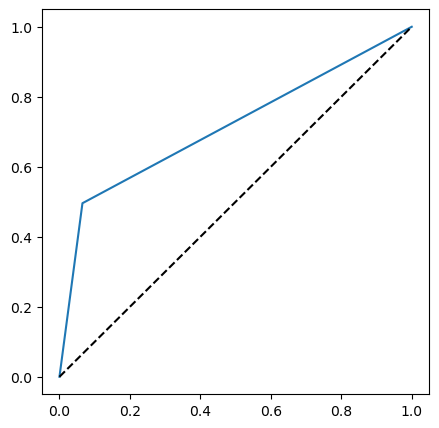

In [42]:
# the ROC curve
fpr,tpr,threshs = roc_curve(y_test,y_pred)
plt.subplots(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),ls='--',color='k')
plt.show()

#### The Logistic Regression Classifier

In [43]:
mod_lr = LogisticRegression()

#training the model
mod_lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
# testing the model
y_predlr = mod_lr.predict(X_test)

#accuracy score
print(f'The accuracy score of the Logistic Regression model is {accuracy_score(y_test,y_predlr)}')

The accuracy score of the Logistic Regression model is 0.8258706467661692


<Axes: >

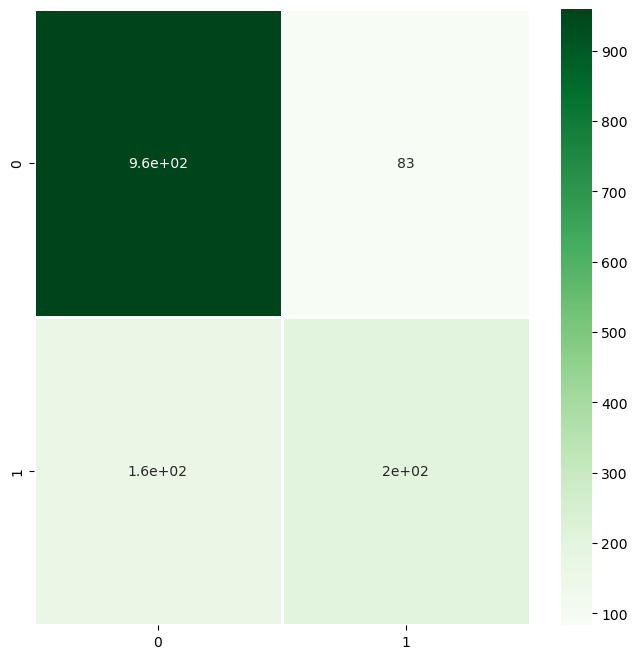

In [48]:
# the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_predlr),cmap='Greens',linewidth=2,annot=True)

In [47]:
# precision, recall, fscore, support
prec, rec, f, supp = precision_recall_fscore_support(y_test,y_predlr)
print(f'The precison:NoChurn {prec[0]:.2f} and Churn {prec[1]:.2f}\nThe Recall:No Churn {rec[0]:.2f} and Churn {rec[1]:.2f}\nThe F-score:No Churn {f[0]:.2f} and Churn {f[1]:.2f}\nThe support:No Churn {supp[0]} and Churn {supp[1]}\n')

The precison:NoChurn 0.86 and Churn 0.71
The Recall:No Churn 0.92 and Churn 0.56
The F-score:No Churn 0.89 and Churn 0.62
The support:No Churn 1042 and Churn 365



In [50]:
# the area under the ROC curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_predlr)
print(f'The area under the ROC curve is {auc}')

The area under the ROC curve is 0.7382549365025111


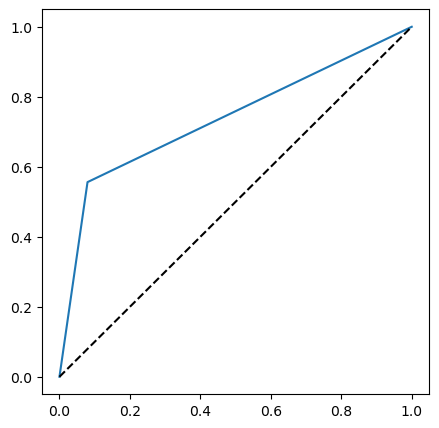

In [49]:
# the ROC curve
fpr,tpr,threshs = roc_curve(y_test,y_predlr)
plt.subplots(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),ls='--',color='k')
plt.show()

#### Decision Tree Classifier

In [61]:
# the dct classifier model
mod_dct = DecisionTreeClassifier(max_depth=5,criterion='entropy')

#fitting the model
mod_dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [62]:
#predicting on the test dataset
y_predct = mod_dct.predict(X_test)

print(f'The accuracy score of the Decision Tree is: {accuracy_score(y_test,y_predct)}')

The accuracy score of the Decision Tree is: 0.8130774697938877


<Axes: >

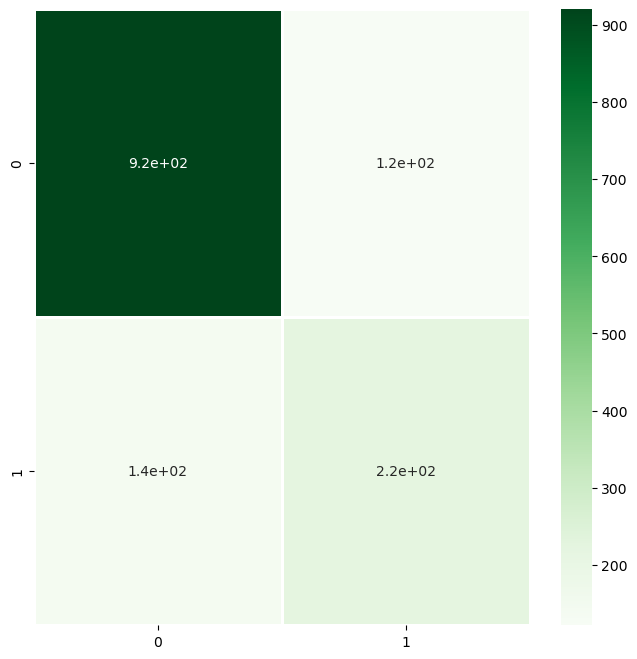

In [63]:
# the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_predct),cmap='Greens',linewidth=2,annot=True)

In [65]:
# precision, recall, fscore, support
prec, rec, f, supp = precision_recall_fscore_support(y_test,y_predct)
print(f'The precison:NoChurn {prec[0]:.2f} and Churn {prec[1]:.2f}\nThe Recall:No Churn {rec[0]:.2f} and Churn {rec[1]:.2f}\nThe F-score:No Churn {f[0]:.2f} and Churn {f[1]:.2f}\nThe support:No Churn {supp[0]} and Churn {supp[1]}\n')

The precison:NoChurn 0.87 and Churn 0.65
The Recall:No Churn 0.88 and Churn 0.61
The F-score:No Churn 0.87 and Churn 0.63
The support:No Churn 1042 and Churn 365



In [67]:
# the area under the ROC curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_predct)
print(f'The area under the ROC curve is {auc}')

The area under the ROC curve is 0.7483080482738675


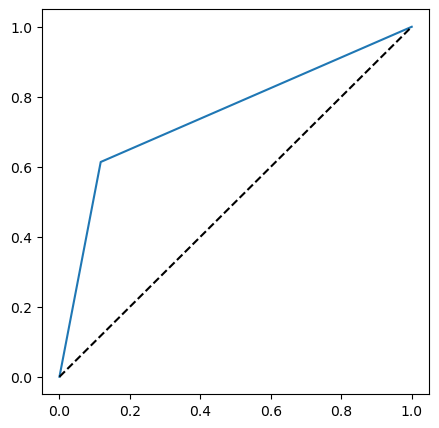

In [68]:
# the ROC curve
fpr,tpr,threshs = roc_curve(y_test,y_predct)
plt.subplots(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),ls='--',color='k')
plt.show()

# Summary
From the above models, we can say that the Random Forest Model performs the best. Customer Churn hurts a company's customer base and revenue potential, hence it's profitability.

Analysis on an operational level would help the management to find which departments or services is causing the customers to churn out. As long as the issues are identified, customer churn can be mitigated. Identifying customers who are at risk of churning and working on improving their experience would help in building a loyal customer base and revenue stream